In [2]:
%run 'data_processing.ipynb'

Remaining rows:  6848


In [3]:
import seaborn as sns
import scipy

In [7]:
# Feature columns in df_atus
FEATURE_COLS = ['HH_SIZE', 'FAMINCOME', 'POVERTY130', 'POVERTY185',
       'POVERTYLEVEL', 'FOODSTAMP', 'WIC', 'HHTENURE', 'HH_CHILD', 'HOUSETYPE',
       'HH_NUMKIDS', 'HH_SIZE_CPS8', 'HH_CHILD_CPS8', 'QFAMINCOME', 'PERNUM',
       'LINENO', 'WT06', 'AGE', 'SEX', 'RACE', 'MARST', 'GENHEALTH', 'HEIGHT',
       'WEIGHT', 'BMI', 'EH_RESP', 'PED', 'SED_EAT', 'FOODSHOP', 'MEALPREP',
       'SODA', 'DIETSODA', 'MILK', 'MEAT', 'STORE', 'STREASON', 'EXERCISE',
       'EXFREQ', 'FASTFD', 'FASTFDFREQ', 'FDTHERM', 'ENOUGHFD', 'ANYSECDRK',
       'ANYSECEAT']
CONTINUOUS_FEATURES = ['HH_SIZE', 'HH_NUMKIDS', 'HH_CHILD',
                       'WT06', 'AGE',
                      'PED', 'SED_EAT', 'EXFREQ']
# cannot include weight and height because these are directly associated with
# BMI
EXCLUDED_CONTINUOUS_FEATURES = ['HEIGHT', 'WEIGHT']
CATEGORICAL_FEATURES = ['FAMINCOME', 'POVERTY130', 'POVERTY185',
                       'POVERTYLEVEL', 'FOODSTAMP', 'WIC',
                       'HHTENURE', 'HOUSETYPE', 'QFAMINCOME',
                       'GENHEALTH', 'SEX', 'RACE', 'MARST',
                       'EH_RESP', 'FOODSHOP', 'MEALPREP',
                       'SODA', 'DIETSODA', 'MILK', 'MEAT', 'STORE', 
                        'STREASON', 'EXERCISE',
                       'FASTFD', 'FDTHERM', 'ENOUGHFD', 'ANYSECDRK',
                       'ANYSECEAT']

FASTFDFREQ was excluded b/c lack of usable responses in survey.

### Spearman correlation matrix of candidate continuous features

To get an intuition for correlations between categorical features – which, in addition to not being continuous, may not have linear relationships – below is a correlation matrix generated using Spearman's rank correlation coefficient.

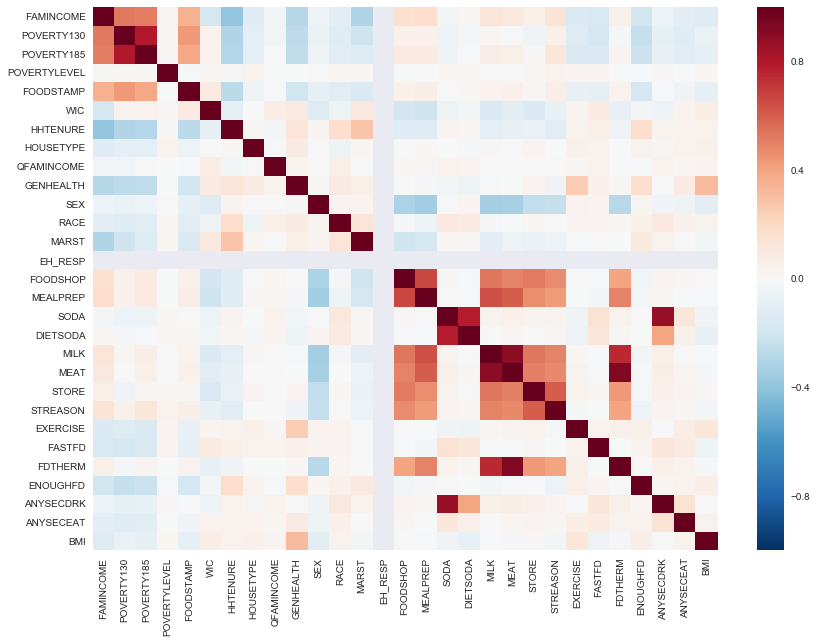

In [10]:
categorical_corrmat = (df_atus[CATEGORICAL_FEATURES + ['BMI']]).corr(method='spearman')

f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(categorical_corrmat)
plt.show()

### Pearson correlation matrix of candidate continuous features

Since Pearson correlation only works with continuous variables,
only such features have been visualized below.

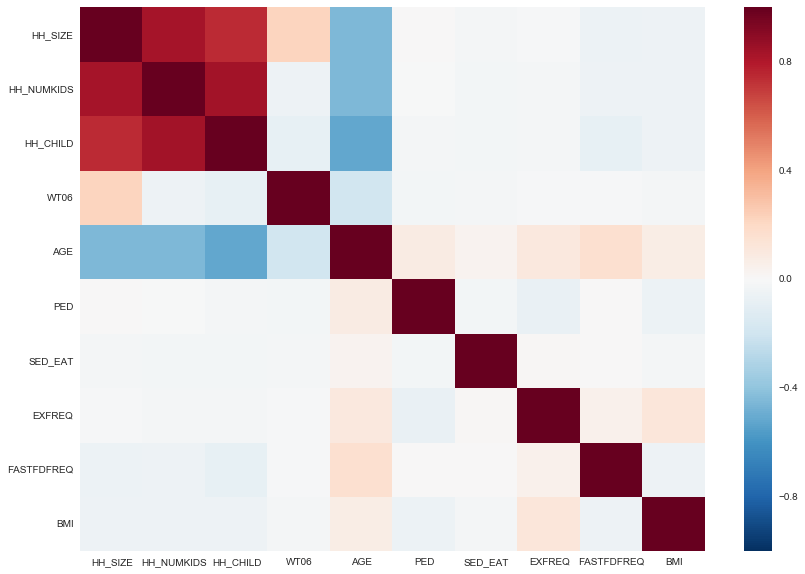

In [7]:
corrmat = (df_atus[CONTINUOUS_FEATURES + ['BMI']]).corr()

f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(corrmat)
plt.show()

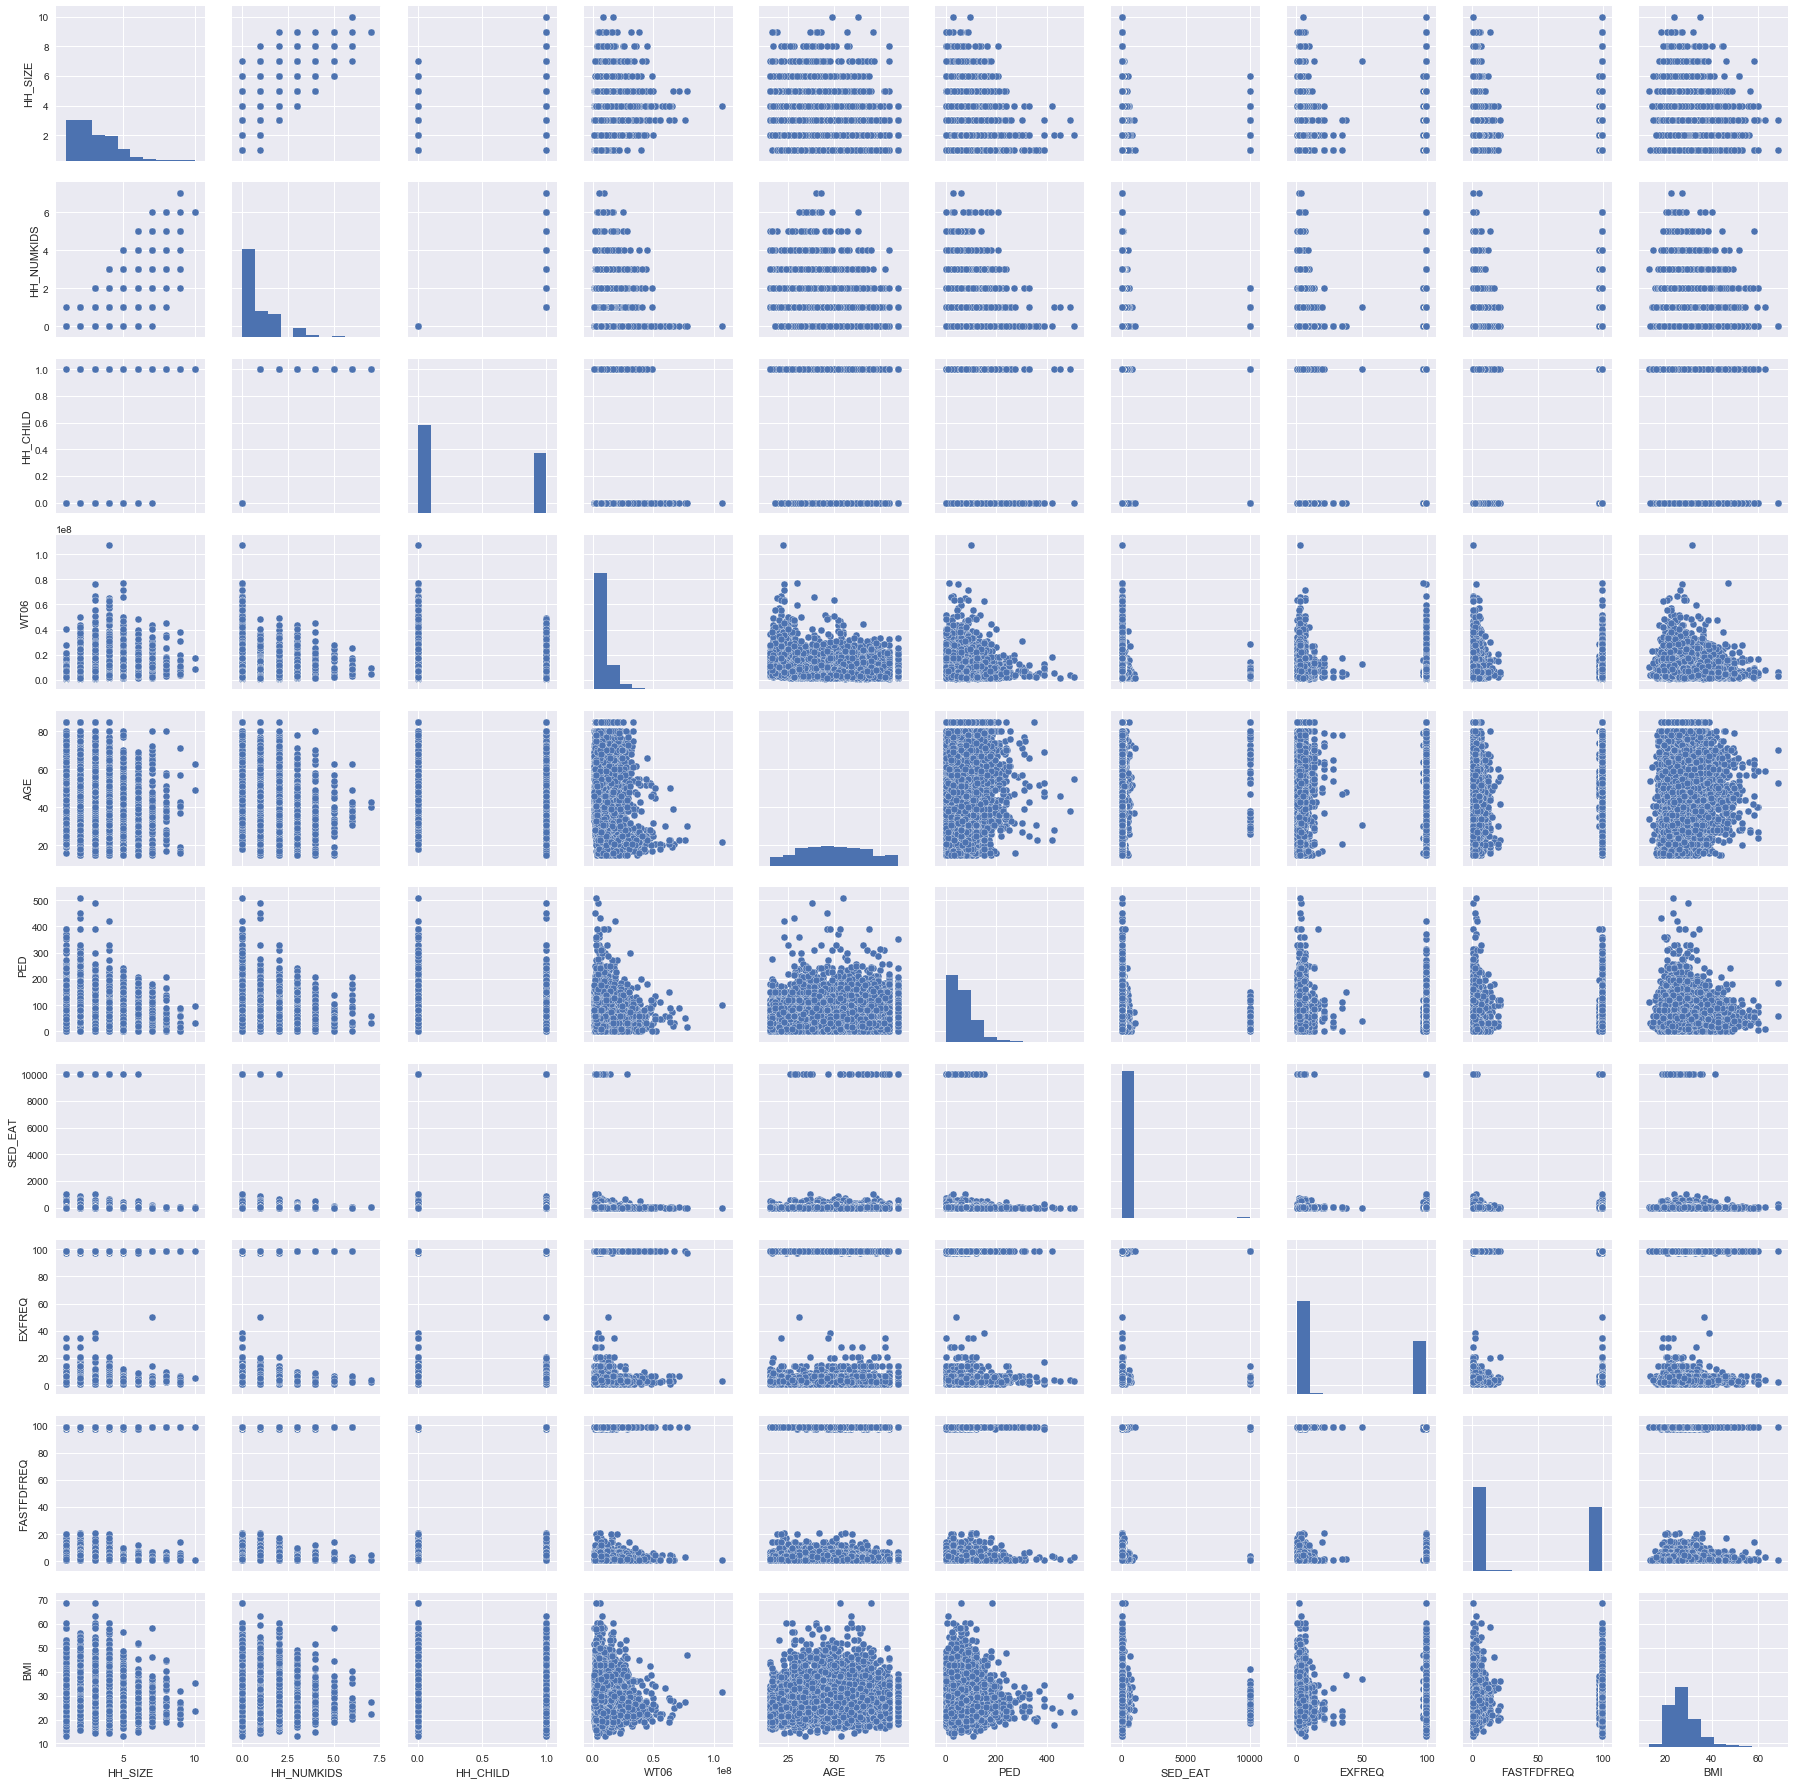

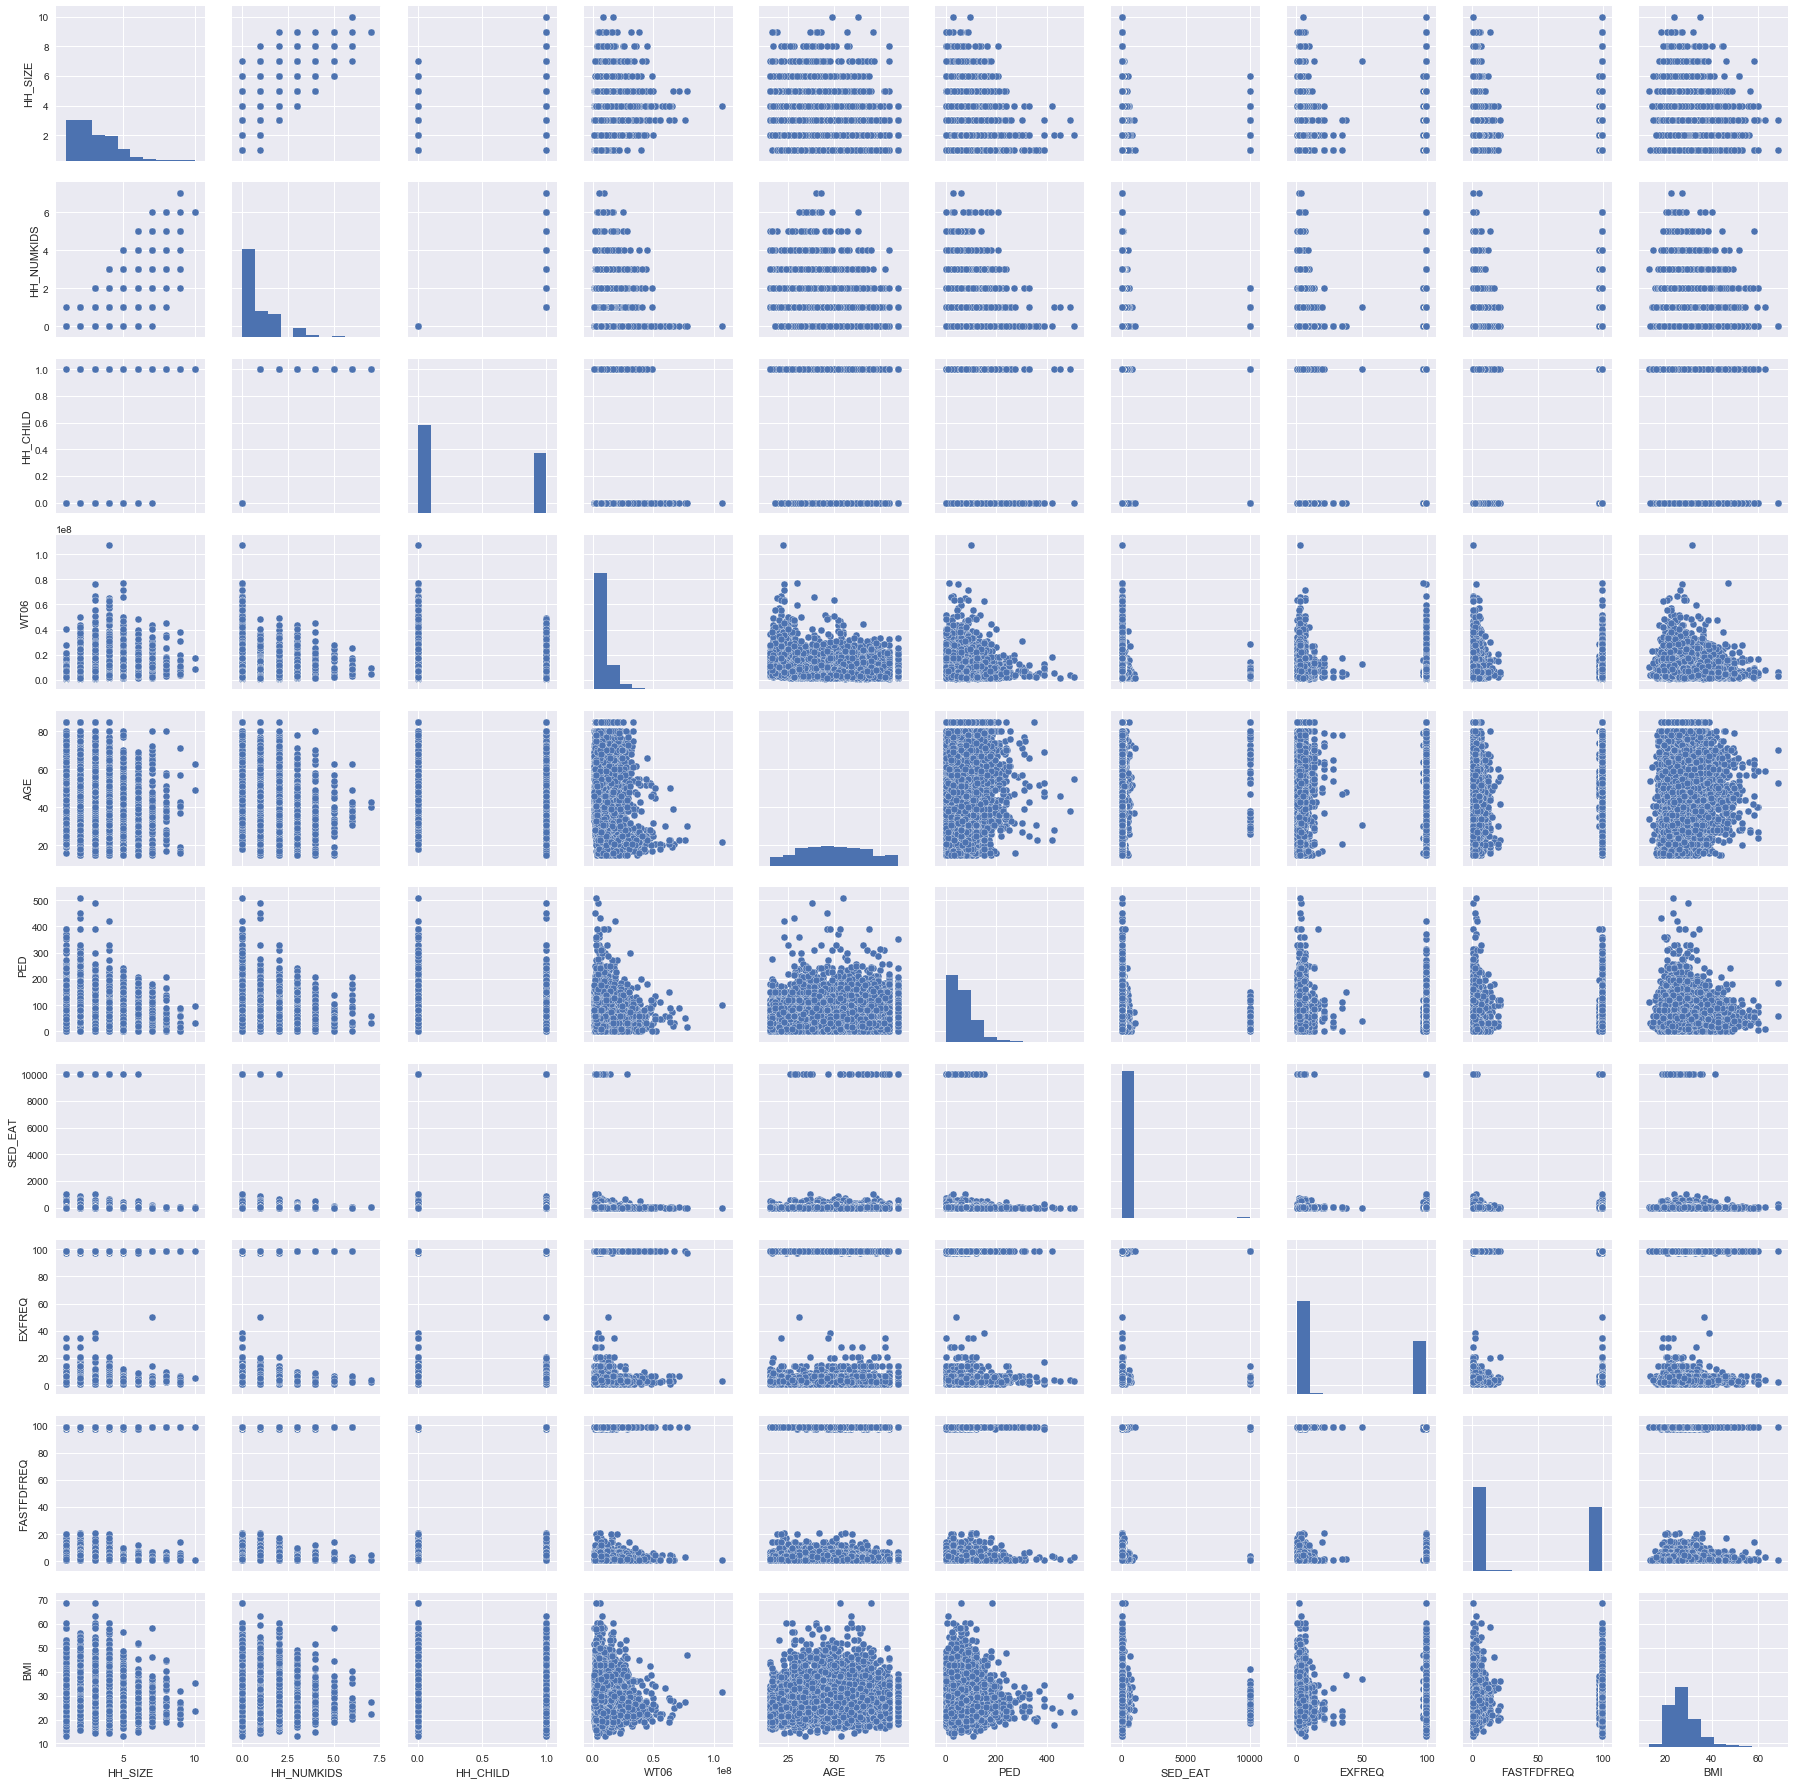

In [9]:
sns.pairplot(df_atus[CONTINUOUS_FEATURES + ['BMI']])
plt.show()

## Histogram of Y label (BMI) distribution

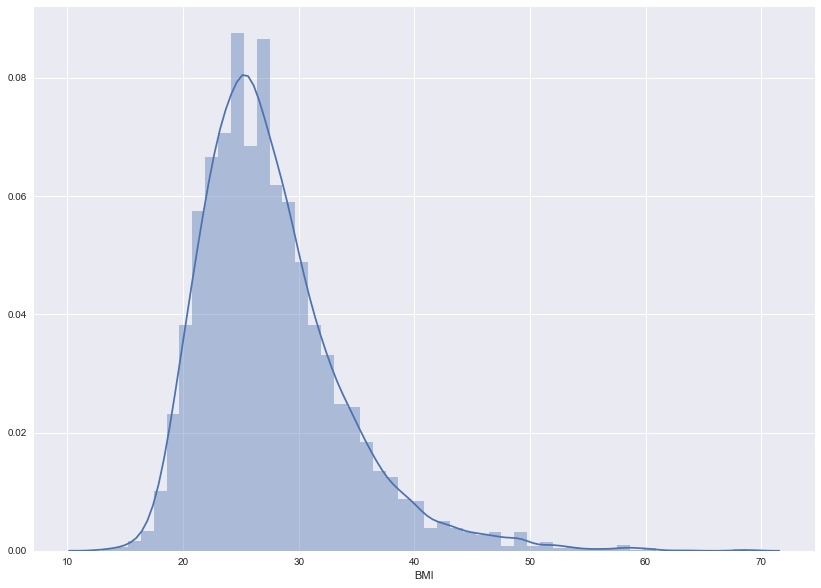

In [42]:
f, ax = plt.subplots(figsize=(14, 10))

sns.distplot(df_atus['BMI'])

plt.show()

In [45]:
# Check for normal distribution
stat, pval = scipy.stats.normaltest(df_atus['BMI'])
stat, pval

(1742.4739378228858, 0.0)

Because pval=0.0, we reject null hypothesis that the data are normally distributed. As evident in the histogram, the distribution is right-skewed with two modes.

In [48]:
df_atus['BMI'].describe()

count    6848.000000
mean       27.648102
std         6.169784
min        13.000000
25%        23.400000
50%        26.600000
75%        30.500000
max        68.700000
Name: BMI, dtype: float64

In [46]:
df_atus['BMI'].mode()

0    25.8
dtype: float64

In [49]:
df_atus['BMI'].median()

26.6

For BMI, the mode is at 25.8, the median is at 26.6, and the interquartile range (IQR) is 30.5-23.4 = 7.1

On the BMI scale, 25 to 29.9 is considered overweight, while a BMI of >30 is considered obese.

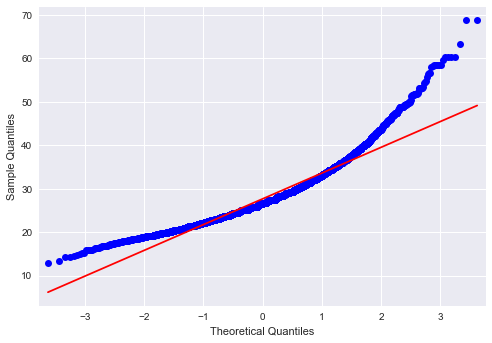

In [22]:
import statsmodels.api as sm

fig = sm.qqplot(df_atus['BMI'], line='r')
plt.show()

Though the earlier normaltest – based on D'Agostino and Pearson's test that combines skew and kurtosis for a test of normality – rejected with 100% certainty that the distribution was a normal distribution, the Q-Q plot reveals a more nuanced picture.

The Q-Q plot shows that the BMI resembles a right-skewed normal distribution.